## Домашнее задание «Проблема качества данных»


In [110]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

--2022-11-04 08:11:24--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv.1’

titanic.csv.1       100%[===================>]  58.89K  --.-KB/s    in 0.007s  

2022-11-04 08:11:24 (7.90 MB/s) - ‘titanic.csv.1’ saved [60302/60302]



In [111]:
import pandas as pd

In [112]:
data = pd.read_csv("titanic.csv")

In [113]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Посмотрим на пропуски

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Видим, что есть отсутствующие значения в колонке Age и очень мало данных в колонке Cabin

Посмотрим на статистику

In [115]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### "Наивная" модель
Создадим "наивную" модель, выкинув все пропуски и категориальные признаки

Выкидываем колонку `Cabin` целиком

In [116]:
data.drop(columns=['Cabin'], axis=1, inplace=True)

Удалим строки с пропущенными значениями

In [117]:
data.dropna(inplace=True)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


Удалим все нечисловые категориальные колонки

In [119]:
data.drop(columns=['Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [120]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


Разделим данные на массив признаков и массив меток класса

In [121]:
X = data.drop(columns=['Survived'], axis=1)
y = data['Survived']

Для обучения возьмем LogisticRegression + StandartScaler

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, f1_score

In [123]:
model = make_pipeline(StandardScaler(), LogisticRegression())

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [125]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Получим метрики качества ROC_AUC и F1 для тренировочных данных

In [126]:
predict_proba = model.predict_proba(X_train)

In [127]:
roc_auc_score(y_train, predict_proba[:, 1])

0.7643300615709612

In [128]:
predictions = model.predict(X_train)

In [129]:
f1_score(y_train, predictions)

0.5935162094763091

Получим эти же метрики с тестовых данных

In [130]:
predict_proba = model.predict_proba(X_test)

In [131]:
roc_auc_score(y_test, predict_proba[:, 1])

0.7309076369452219

In [132]:
predictions = model.predict(X_test)

In [133]:
f1_score(y_test, predictions)

0.5599999999999999

### Модель с предварительной обработкой

In [134]:
dropna_lenght = len(data)
data = pd.read_csv("titanic.csv")
full_lenght = len(data)

Процент потеряных данных после применения `dropna`

In [135]:
(1 - dropna_lenght/full_lenght)*100

20.08978675645342

Проанализируем цены в зависимости от класса, что-бы определить наличие выбросов



In [136]:
t = PrettyTable(["Class", 'Count', 'Min', 'Max', 'Mean', 'Median', 'Mode'])
for class_ in [1,2,3]:
    fares = data[data['Pclass'] == class_]['Fare']
    t.add_row([class_, fares.count(), fares.min(), fares.max(), fares.mean(), fares.median(), fares.mode()])
print(t)


+-------+-------+-----+----------+--------------------+--------------------+----------------+
| Class | Count | Min |   Max    |        Mean        |       Median       |      Mode      |
+-------+-------+-----+----------+--------------------+--------------------+----------------+
|   1   |  216  | 0.0 | 512.3292 |     84.1546875     | 60.287499999999994 |   0    26.55   |
|       |       |     |          |                    |                    | dtype: float64 |
|   2   |  184  | 0.0 |   73.5   | 20.662183152173913 |       14.25        |   0    13.0    |
|       |       |     |          |                    |                    | dtype: float64 |
|   3   |  491  | 0.0 |  69.55   | 13.675550101832993 |        8.05        |   0    8.05    |
|       |       |     |          |                    |                    | dtype: float64 |
+-------+-------+-----+----------+--------------------+--------------------+----------------+


Значение 512.3292 кажется слишком большим, посмотрим на данные с таким значение `Fare`

In [137]:
data[data['Fare'] > 512]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Видно, что это один билет сразу на трех человек с, как миниммум, четырьма каютами.

Удалим колонку `PassengerId`, т.к. она не несет никакой информации

Также удалим колонку `Cabin`, т.к. в ней слишком много пропусков и никакой полезной информации из нее нельзя извлечь

Удалим колонку `Ticket`, т.к. номер билета не несет никакой информации

In [138]:
data.drop(columns=['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


Преобразуем колонку `Name` путем извлечения из нее обращения (Mrs, Mr, и т.д.)

In [140]:
data['Name'] = data['Name'].str.replace(r'^.*?\,\s([\s\w]+?)\..*?$', r'\1', regex=True)

In [141]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Miss,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S


Обращение косвенно указывает на возраст, проверим эту гипотезу

In [142]:
from prettytable import PrettyTable
t = PrettyTable(["Title", 'Count', 'Min', 'Max', 'Mean', 'Median'])
for title in data['Name'].unique():
    ages = data[data['Name'] == title]['Age']
    t.add_row([title, ages.count(), ages.min(), ages.max(), ages.mean(), ages.median()])

In [143]:
print(t)

+--------------+-------+------+------+--------------------+--------+
|    Title     | Count | Min  | Max  |        Mean        | Median |
+--------------+-------+------+------+--------------------+--------+
|      Mr      |  398  | 11.0 | 80.0 | 32.368090452261306 |  30.0  |
|     Mrs      |  108  | 14.0 | 63.0 | 35.898148148148145 |  35.0  |
|     Miss     |  146  | 0.75 | 63.0 | 21.773972602739725 |  21.0  |
|    Master    |   36  | 0.42 | 12.0 | 4.574166666666667  |  3.5   |
|     Don      |   1   | 40.0 | 40.0 |        40.0        |  40.0  |
|     Rev      |   6   | 27.0 | 57.0 | 43.166666666666664 |  46.5  |
|      Dr      |   6   | 23.0 | 54.0 |        42.0        |  46.5  |
|     Mme      |   1   | 24.0 | 24.0 |        24.0        |  24.0  |
|      Ms      |   1   | 28.0 | 28.0 |        28.0        |  28.0  |
|    Major     |   2   | 45.0 | 52.0 |        48.5        |  48.5  |
|     Lady     |   1   | 48.0 | 48.0 |        48.0        |  48.0  |
|     Sir      |   1   | 49.0 | 49

In [144]:
data[['Name', 'Sex', 'Survived']].pivot_table(index='Sex', columns='Name', aggfunc='count')

Survived                                                             \
Name       Capt  Col  Don   Dr Jonkheer Lady Major Master   Miss Mlle  Mme   
Sex                                                                          
female      NaN  NaN  NaN  1.0      NaN  1.0   NaN    NaN  182.0  2.0  1.0   
male        1.0  2.0  1.0  6.0      1.0  NaN   2.0   40.0    NaN  NaN  NaN   

                                                  
Name       Mr    Mrs   Ms  Rev  Sir the Countess  
Sex                                               
female    NaN  125.0  1.0  NaN  NaN          1.0  
male    517.0    NaN  NaN  6.0  1.0          NaN

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

(0.0, 80.0)

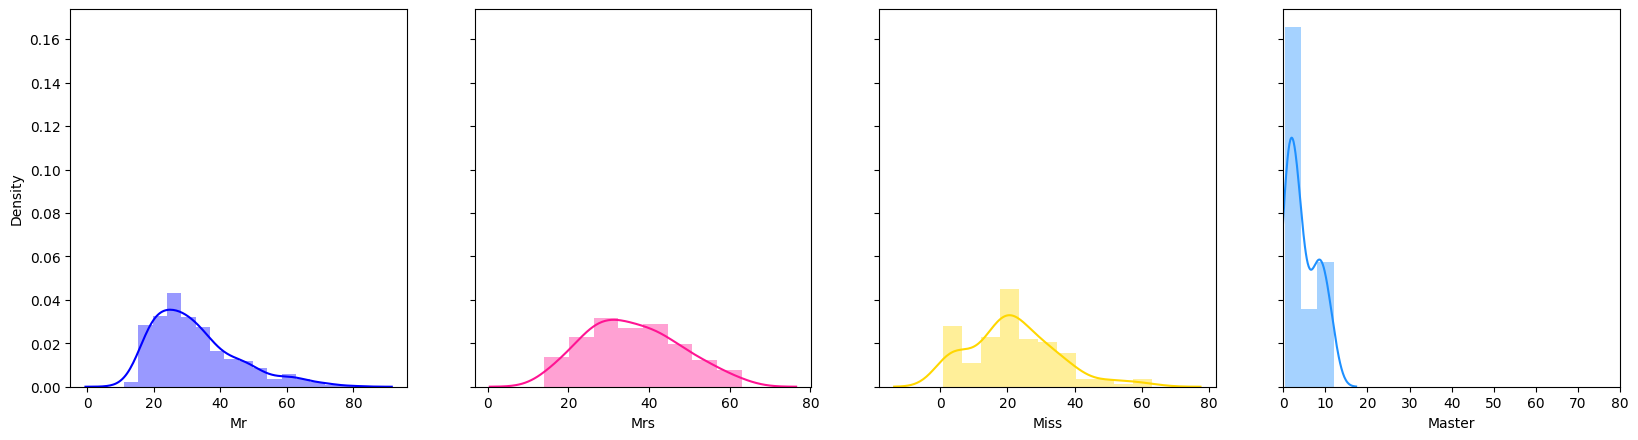

In [145]:
import seaborn as sns

x1 = data.loc[data['Name'] == 'Mr', 'Age']
x2 = data.loc[data['Name'] == 'Mrs', 'Age']
x3 = data.loc[data['Name'] == 'Miss', 'Age']
x4 = data.loc[data['Name'] == 'Master', 'Age']

fig, axes = plt.subplots(1,4, figsize=(20, 5), sharey=True, dpi=100)
sns.distplot(x1, color='blue', ax=axes[0], axlabel='Mr')
sns.distplot(x2, color='deeppink', ax=axes[1], axlabel='Mrs')
sns.distplot(x3, color='gold', ax=axes[2], axlabel='Miss')
sns.distplot(x4, color='dodgerblue', ax=axes[3], axlabel='Master')
plt.xlim(0,80)



Попробуем свести все встречающиеся обращения к 4-ю наиболее встречающимся классам:
* Mr - Мужчина (Mister)
* Mrs - Замужняя женщина (Missis)
* Miss - Незамужняя женщина, девочка (Miss)
* Master - Ребенок мужского пола

Для остальных классов напишем соответствия:

* Don - Mr
* Rev - оставляем как есть (Священник)
* Dr - оставляем как есть (встречаются оба пола)
* Mme - Mrs
* Ms - Miss
* Major - Mr
* Lady - Mrs
* Sir - Mr
* Mlle - Miss
* Col - Mr
* Capt - Mr
* Countess - Mrs (Графиня)
* Jonkheer - Mr (мужчина 38 лет)

Для всех измененных признаков выставляем специальный флаг `title_changed`

In [146]:
data['title_changed'] = 0
data.loc[data['Name'].isin(['Don', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer']), 'title_changed'] = 1
data.loc[data['Name'].isin(['Don', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer']), 'Name'] = 'Mr'
data.loc[data['Name'].isin(['Mme', 'Lady', 'the Countess']), 'title_changed'] = 1
data.loc[data['Name'].isin(['Mme', 'Lady', 'the Countess']), 'Name'] = 'Mrs'
data.loc[data['Name'].isin(['Ms', 'Mlle']), 'title_changed'] = 1
data.loc[data['Name'].isin(['Ms', 'Mlle']), 'Name'] = 'Miss'

In [147]:
from prettytable import PrettyTable
t = PrettyTable(["Title", 'Count', 'Min', 'Max', 'Mean', 'Median'])
for title in data['Name'].unique():
    ages = data[data['Name'] == title]['Age']
    t.add_row([title, ages.count(), ages.min(), ages.max(), ages.mean(), ages.median()])
print(t)

+--------+-------+------+------+--------------------+--------+
| Title  | Count | Min  | Max  |        Mean        | Median |
+--------+-------+------+------+--------------------+--------+
|   Mr   |  406  | 11.0 | 80.0 | 32.74014778325123  |  30.0  |
|  Mrs   |  111  | 14.0 | 63.0 | 35.873873873873876 |  35.0  |
|  Miss  |  149  | 0.75 | 63.0 | 21.845637583892618 |  21.0  |
| Master |   36  | 0.42 | 12.0 | 4.574166666666667  |  3.5   |
|  Rev   |   6   | 27.0 | 57.0 | 43.166666666666664 |  46.5  |
|   Dr   |   6   | 23.0 | 54.0 |        42.0        |  46.5  |
+--------+-------+------+------+--------------------+--------+


Заполним пропуски по возрасту медианным значением добавив колонку с признаком, что данные вычислены `age_changed`

In [148]:
data['age_changed'] = 0
for title in data['Name'].unique():
    data.loc[(data['Name'] == title) & data['Age'].isnull(), 'age_changed'] = 1
    data.loc[(data['Name'] == title) & data['Age'].isnull(), 'Age'] = data[data['Name'] == title]['Age'].median()

У нас остались пропуски в колонке `Embarked`

In [149]:
data['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

Заполним их модальным значением, на всякий случай добавив колонку признака `embarked_changed`

In [150]:
data['embarked_changed'] = 0
data.loc[data['Embarked'].isnull(), 'embarked_changed'] = 1
data.loc[data['Embarked'].isnull(), 'Embarked'] = 'S'

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Pclass            891 non-null    int64  
 2   Name              891 non-null    object 
 3   Sex               891 non-null    object 
 4   Age               891 non-null    float64
 5   SibSp             891 non-null    int64  
 6   Parch             891 non-null    int64  
 7   Fare              891 non-null    float64
 8   Embarked          891 non-null    object 
 9   title_changed     891 non-null    int64  
 10  age_changed       891 non-null    int64  
 11  embarked_changed  891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


Преобразуем категориальные признаки с помощью one-hot encoder. Причем колонку `Pclass` преобразуем таким же образом, т.к. это тоже категориальный признак.


In [152]:
data_transformed = pd.get_dummies(data, columns=['Pclass','Name', 'Sex', 'Embarked'])
data_transformed.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'title_changed',
       'age_changed', 'embarked_changed', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Name_Dr', 'Name_Master', 'Name_Miss', 'Name_Mr', 'Name_Mrs',
       'Name_Rev', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

Посмотрим корреляцию возраста, пола, и вероятности выжить

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


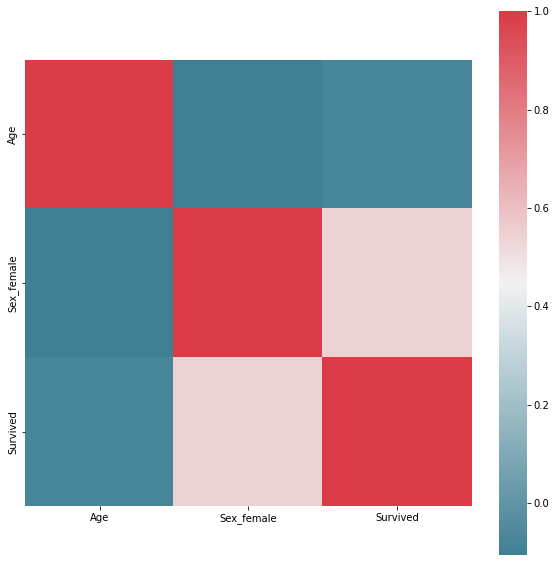

In [153]:
import numpy as np
f, ax = plt.subplots(figsize=(10,10))
corr = data_transformed[['Age', 'Sex_female', 'Survived']].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Видно, что чем старше человек, тем меньше вероятности выжить, у женщин вероятность выжить чуть выше

### Улучшенная модель

In [154]:
y = data_transformed['Survived']
X = data_transformed.drop(['Survived'], axis=1)

Посмотрим на перекос класса

In [155]:
y.value_counts()[0]/y.value_counts()[1]

1.605263157894737

Видим некоторый перекос
Для разбиения обучающей и проверочной выборок используем стратификацию

In [156]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, stratify=y)

In [157]:
model = make_pipeline(StandardScaler(), LogisticRegression())

In [158]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Получим метрики качества аналогично "наивной модели"

In [159]:
predict_proba = model.predict_proba(X_train)

In [160]:
roc_auc_score(y_train, predict_proba[:, 1])

0.8858210885545739

In [161]:
predictions = model.predict(X_train)

In [162]:
f1_score(y_train, predictions)

0.783427495291902

In [163]:
predict_proba = model.predict_proba(X_test)

In [164]:
roc_auc_score(y_test, predict_proba[:, 1])

0.8554018445322794

In [165]:
predictions = model.predict(X_test)

In [166]:
f1_score(y_test, predictions)

0.7286821705426356

### Выводы
Оценки качества:

| model         | train ROC_AUC      | test ROC_AUC       | train F1           | test F1            |
|---------------|--------------------|--------------------|--------------------|--------------------|
| "Наивная" LR  | 0.7643300615709612 | 0.7309076369452219 | 0.5935162094763091 | 0.5599999999999999 |
| Улучшенная LR | 0.8858210885545739 | 0.8554018445322794 | 0.783427495291902  | 0.7286821705426356 |

После предобработки данных заметно существенное улучшение качества модели

Сделанные преобразования:
- проверка цены билета на выбросы
- замена пропусков в возрасте медианным значением в зависимости от статуса пассажира при этом добавлена колонка признака, что данные вычислены
- замена порта посадки модальным значением, при этом добавлена колонка признака, что данные вычислены
- замена категориальных признаков с помощью one-hot encoder

